<a href="https://colab.research.google.com/github/TizanatunNafisah/Research_2024/blob/main/analisis_sentimen_mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PANALISIS SENTIMEN ULASAN MAHASISWA MENGGUNAKAN SVM, SVM-RFE, RNN DAN RNN-LSTM

**Analisis dengan Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Langkah 1: Memuat Data dari Excel
file_path = 'final.xlsx'  # Ganti dengan path file Excel kamu
df = pd.read_excel(file_path)

# Langkah 2: Pra-pemrosesan Data
# Misalnya, kolom 'review' berisi teks dan kolom 'sentiment' berisi label (0 untuk negatif, 1 untuk positif)
df['text'] = df['text'].str.lower().str.replace('[^\w\s]', '')

# Langkah 3: Membagi Data
X = df['text']
y = df['Sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Langkah 4: Melatih Model SVM
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Memprediksi hasil pada data uji
y_pred = model.predict(X_test_tfidf)

# Mengevaluasi Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

     negatif       0.75      0.75      0.75         4
     positif       0.94      0.94      0.94        17

    accuracy                           0.90        21
   macro avg       0.85      0.85      0.85        21
weighted avg       0.90      0.90      0.90        21



**Analisis Sentimen Dengan Support Vector Machine- Recursife Feature Elimination**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Membaca data
data = pd.read_excel('final.xlsx')  # Ubah nama file sesuai dengan dataset Anda

# Memisahkan fitur dan label
X = data['text']
y = data['Sentimen']

# Mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Membuat model SVM
svc = SVC(kernel="linear")

# Membuat RFE untuk seleksi fitur
rfe = RFE(estimator=svc, n_features_to_select=1000)  # Pilih jumlah fitur yang diinginkan

# Membuat pipeline
pipeline = Pipeline([
    ('feature_selection', rfe),
    ('classification', svc)
])

# Melatih model
pipeline.fit(X_train, y_train)

# Evaluasi model
y_pred = pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Menyimpan model
joblib.dump(pipeline, 'svm_rfe_model.pkl')


Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

     negatif       0.75      0.75      0.75         4
     positif       0.94      0.94      0.94        17

    accuracy                           0.90        21
   macro avg       0.85      0.85      0.85        21
weighted avg       0.90      0.90      0.90        21



['svm_rfe_model.pkl']

**Analisis Sentimen dengan Recurrent Neural Network**

In [ ]:
#menginstall library yang dibutuhkan

!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Langkah 1: Memuat Data dari Excel
file_path = 'final.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# Pastikan kolom-kolom ini ada: 'review' untuk teks dan 'sentiment' untuk label
texts = df['text'].astype(str).tolist()
labels = df['Sentimen'].tolist()

# Langkah 2: Pra-pemrosesan Data
# Tokenisasi teks
tokenizer = Tokenizer(num_words=10000)  # Menyimpan 10.000 kata yang paling umum
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding untuk memastikan panjang urutan yang seragam
X = pad_sequences(sequences, maxlen=100)  # Sesuaikan maxlen dengan panjang input yang diinginkan

# Encode labels to numerical values (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Convert string labels to numerical

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 3: Membangun Model RNN
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Layer 1: Embedding Layer
model.add(SimpleRNN(64, return_sequences=True))  # Layer 2: SimpleRNN Layer dengan return_sequences=True
model.add(Dropout(0.5))  # Layer 3: Dropout Layer dengan rate 0.5
model.add(SimpleRNN(32))  # Layer 4: SimpleRNN Layer tanpa return_sequences
model.add(Dense(1, activation='sigmoid'))  # Layer 5: Dense Layer untuk binary classification

# Menyusun (kompilasi) model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Mengevaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Melihat ringkasan model
model.summary()

Epoch 1/5
3/3 [==============================] - 3s 310ms/step - loss: 0.6654 - accuracy: 0.6061 - val_loss: 0.9624 - val_accuracy: 0.2941
Epoch 2/5
3/3 [==============================] - 0s 94ms/step - loss: 0.5918 - accuracy: 0.6818 - val_loss: 0.6923 - val_accuracy: 0.5294
Epoch 3/5
3/3 [==============================] - 0s 97ms/step - loss: 0.5112 - accuracy: 0.7879 - val_loss: 1.0191 - val_accuracy: 0.2941
Epoch 4/5
3/3 [==============================] - 0s 98ms/step - loss: 0.5470 - accuracy: 0.6970 - val_loss: 0.6776 - val_accuracy: 0.6471
Epoch 5/5
1/1 [==============================] - 0s 40ms/step - loss: 0.5068 - accuracy: 0.8095
Loss: 0.5068389773368835
Accuracy: 0.8095238208770752
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 simple_rnn

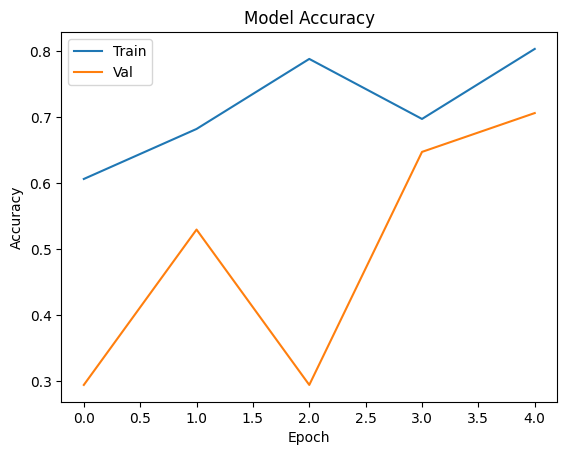

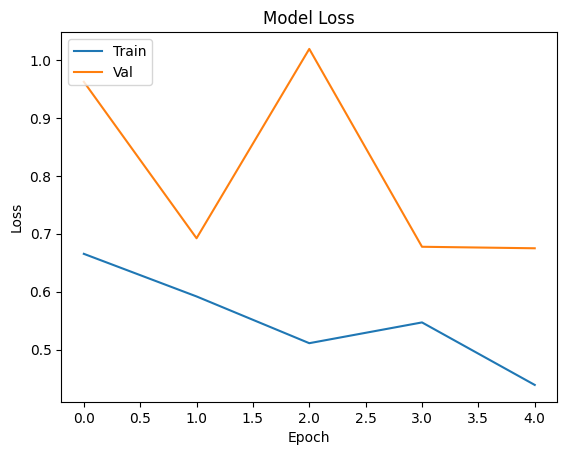

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Analisis Sentimen dengan RNN-Long Short-Term Memory**

Epoch 1/5
3/3 [==============================] - 6s 650ms/step - loss: 0.6927 - accuracy: 0.4545 - val_loss: 0.6761 - val_accuracy: 0.6471
Epoch 2/5
3/3 [==============================] - 0s 145ms/step - loss: 0.6633 - accuracy: 0.6818 - val_loss: 0.6482 - val_accuracy: 0.6471
Epoch 3/5
3/3 [==============================] - 0s 152ms/step - loss: 0.6288 - accuracy: 0.6667 - val_loss: 0.6117 - val_accuracy: 0.6471
Epoch 4/5
3/3 [==============================] - 0s 143ms/step - loss: 0.5903 - accuracy: 0.6667 - val_loss: 0.6010 - val_accuracy: 0.6471
Epoch 5/5
1/1 [==============================] - 0s 49ms/step - loss: 0.4582 - accuracy: 0.8095
Loss: 0.45817646384239197
Accuracy: 0.8095238208770752


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


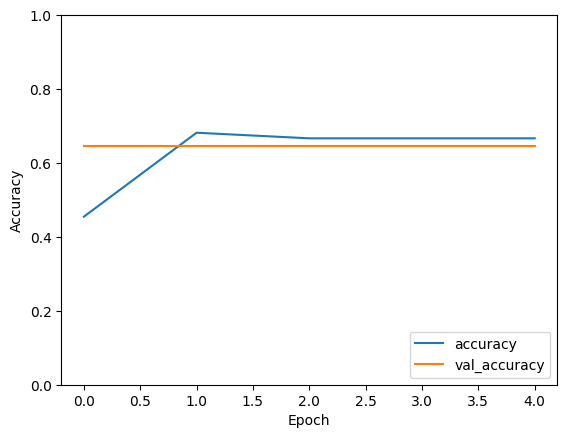

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_excel('final.xlsx')  # Ubah nama file sesuai dengan dataset Anda

# Memisahkan fitur dan label
X = data['text']
y = data['Sentimen']

# Encode label menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenisasi teks
tokenizer = Tokenizer(num_words=10000)  # Sesuaikan num_words sesuai kebutuhan
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences
X_padded = pad_sequences(X_sequences, maxlen=100)  # Sesuaikan maxlen sesuai kebutuhan

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Membangun model RNN
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Sesuaikan input_dim dan output_dim
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))  # Untuk binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Menyimpan model
model.save('rnn_sentiment_model.h5')

# Plotting training history (Opsional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 1. Memuat Data dari Excel
file_path = 'final.xlsx'  # Ganti dengan path ke file Excel kamu
df = pd.read_excel(file_path)

# Pastikan data memiliki kolom 'text' untuk teks dan 'label' untuk label
texts = df['text'].astype(str).tolist()
labels = df['Sentimen'].tolist()  # Pastikan label 0 atau 1 untuk klasifikasi biner

# 2. Encode Labels to Numerical Values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Convert string labels to numerical

# 2. Tokenisasi dan Padding
max_vocab_size = 10000
max_length = 100
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Membagi data menjadi pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 3. Menyusun Model LSTM dengan Beberapa Layer
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_length))

# Layer LSTM pertama
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

# Layer LSTM kedua
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))

# Layer LSTM ketiga
model.add(LSTM(32))
model.add(Dropout(0.5))

# Dense layer tambahan
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Melatih Model
history = model.fit(
    X_train,
    np.array(y_train),
    epochs=5,
    batch_size=32,
    validation_data=(X_val, np.array(y_val))
)

# 5. Mengevaluasi Model
loss, accuracy = model.evaluate(X_val, np.array(y_val))
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Epoch 1/5
3/3 [==============================] - 10s 1s/step - loss: 0.6934 - accuracy: 0.4458 - val_loss: 0.6828 - val_accuracy: 0.8095
Epoch 2/5
3/3 [==============================] - 2s 520ms/step - loss: 0.6863 - accuracy: 0.6627 - val_loss: 0.6516 - val_accuracy: 0.8095
Epoch 3/5
3/3 [==============================] - 1s 301ms/step - loss: 0.6699 - accuracy: 0.6627 - val_loss: 0.5984 - val_accuracy: 0.8095
Epoch 4/5
3/3 [==============================] - 1s 284ms/step - loss: 0.6516 - accuracy: 0.6627 - val_loss: 0.5242 - val_accuracy: 0.8095
Epoch 5/5
1/1 [==============================] - 0s 83ms/step - loss: 0.5053 - accuracy: 0.8095
Loss: 0.5052908062934875
Accuracy: 0.8095238208770752


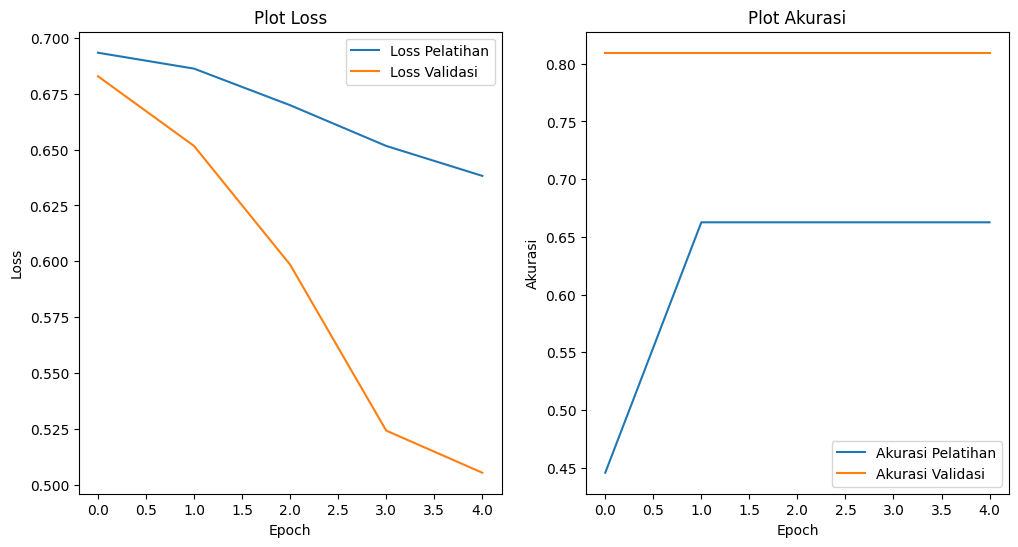

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Plot Loss')

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Plot Akurasi')

plt.show()

**Pake SVM lagi**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords dari nltk (jika belum ada)
nltk.download('punkt')
nltk.download('stopwords')

# Fungsi untuk preprocessing teks
def preprocess_text(text):
    # Menghapus URL, angka, dan karakter khusus
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenisasi dan menghapus stopwords
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Load dataset
data = pd.read_excel('final.xlsx')  # Ganti dengan path ke file Excel-mu

# Preprocessing data
data['text'] = data['text'].apply(preprocess_text)

# Membagi data menjadi fitur dan label
X = data['text']
y = data['Sentimen']  # Pastikan kolom label ada di datasetmu

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Pelatihan model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_tfidf, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy:.4f}')
print('Laporan Klasifikasi:')
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Akurasi: 0.9062
Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.67      0.80      0.73         5
     positif       0.96      0.93      0.94        27

    accuracy                           0.91        32
   macro avg       0.81      0.86      0.84        32
weighted avg       0.92      0.91      0.91        32



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
